In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer as ps
import igraph as ig
import tqdm
import string

C:\Users\halan\AppData\Local\Temp\ipykernel_12400\1295799205.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\halan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\halan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\halan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\halan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\halan\AppData\Roaming\nltk_data...
[

True

In [4]:
# Test code to see how these functions work

text = "This is an example of a bigram in Python"
tokens = word_tokenize(text)  # Tokenizing the text
bigrams = list(ngrams(tokens, 2))  # Creating bigrams

In [5]:
# More test code

print(text)

print(bigrams)

This is an example of a bigram in Python
[('This', 'is'), ('is', 'an'), ('an', 'example'), ('example', 'of'), ('of', 'a'), ('a', 'bigram'), ('bigram', 'in'), ('in', 'Python')]


In [6]:
# Importing dataset
data = pd.read_csv('Sedona_Reviews_With_Sentiment.csv')

In [7]:
# Viewing dataset
data['Review Text']

0      Clean secure apartments in a great location wi...
1      Just excellent people at the Main Office. Clau...
2      I have never written a review before, but I ju...
3      So far the experience has been great and the r...
4      Extremely nice people at The Sedona. My apartm...
                             ...                        
178    Was top but is steadily declining. Halls are d...
179    The apartments are well-appointed, the staff i...
180    Up to now, I have been happy at The Sedona. A ...
181    I absolutely love living at The Sedona! Everyt...
182    Very professional staff and they keep the livi...
Name: Review Text, Length: 183, dtype: object

In [90]:
# The way the TweetTokenizer works it needs an instance for it to work
# To add on, regular Tokenizer does not take into account certain punctuation
# For example, "it's", normal word_tokenizer will split it up into "it" and "'s"
# Whereas TweetTokenizer will turn it into "it's"
ttk = TweetTokenizer()

# Defining the stop words (Language)
stopWords = set(stopwords.words('english'))

In [138]:
def tokenFunction(dataList):

    # Creating temporary list
    tempText = []
    
    # Tokenizing the sentence from the file
    for i in dataList:
        tempText.append(list(ttk.tokenize(i)))

    return tempText

In [139]:
def lemmFunction(dataList):
    
    # Creating temporary list
    tempText = []
    
    # Lemmatizing the tokenized text, this will simplify the words to their
    #   base form.
    for i in dataList:
        tempText.append([w for w in i if not w.lower() in stopWords])

    return tempText

In [140]:
def puncFilter(dataList):
    
    # Creating temporary list
    tempText = []

    # Filtering Punctuation, this will get rid of any punctuation in the data
    for i in dataList:
        tempText.append(' '.join([char for char in i if char not in string.punctuation]))

    return tempText

In [141]:
# Function to Clean List of Data

def textCleaner(dataList):

    # Creating temporary list
    tempText = []

    # Tokenizing the sentence from the file
    tempText = tokenFunction(dataList)

    # Lemmatizing the tokenized text, this will simplify the words to their
    #   base form.
    tempText = lemmFunction(tempText)

    # Filtering Punctuation, this will get rid of any punctuation in the data
    tempText = puncFilter(tempText)

    # Retokenizing, we need to retokenize as the only way I could get the punctuation filter
    #   to work required the tokenized text to turn back into a sentence. The punctuation 
    #   removal needed to be done prior to the lemmatization.
    tempText = tokenFunction(tempText)

    # Returning the new List
    return tempText

In [ ]:
# Function for creating Bigram Lists

def bigramCreator(dataList2):
    
    # Defining a bigramList
    bigramList = []

    # Looping for every line in the list
    for i in dataList2:
        
        # Turning the sentences into bigrams and appending it to bigramList
        bigramList.append(list(ngrams(i, 2)))

    # Returning the new list
    return bigramList

In [159]:
# Function for getting a word count of all the words

def wordCounter(dataList3):

    # Creating temporary dictionary
    tempWordDict = {}
    
    # Cycle through lines in the list parsed through
    for words in dataList3:

        # Cycle through all the words in the lines
        for word in words:

            # Check each word to see if it already exists in tempWordList
            if word not in tempWordDict:

                # If the word does not exist, make it = 1 and it now exists
                tempWordDict[word] = 1
            else:

                # If the word exists then up the counter
                tempWordDict[word] += 1

    # Return the list
    return tempWordDict
    
    

In [ ]:
# Function for sorting reviews by sentiment

def reviewSorter(data, type):

    # Creating list and counter
    Reviews = []
    tempCounter = 0

    # Switch that will check what the user wants
    match type:
        case "Negative":

            # Run through all of the sentences
            for i in data['Sentiment']:

                # Check whether it's the kind they want
                if (i == "Negative"):

                    # Append the sentence to the new list
                    Reviews.append(data.loc[tempCounter, 'Review Text'])

                # Increase the counter
                # This cannot be nested as it must go up alongside the i
                tempCounter += 1    
        case "Positive":
            for i in data['Sentiment']:
                if (i == "Positive"):
                    Reviews.append(data.loc[tempCounter, 'Review Text'])
                tempCounter += 1    
        case "Neutral":
            for i in data['Sentiment']:
                if (i == "Neutral"):
                    Reviews.append(data.loc[tempCounter, 'Review Text'])
                tempCounter += 1    
        case _:

            # To catch any errors
            print("Error in `Type`")

    return Reviews

In [160]:
def DFMaker(DF):
    return pd.DataFrame({'word': [k for k in DF.keys()], 'cnt': [v for v in DF.values()]})

In [ ]:
# This is testing with all the reviews and only tokenization

tempTokenized = tokenFunction(data['Review Text'])
tempBigram = bigramCreator(tempTokenized)
tempWordCount = wordCounter(tempBigram)
wordCountDF = DFMaker(tempWordCount)

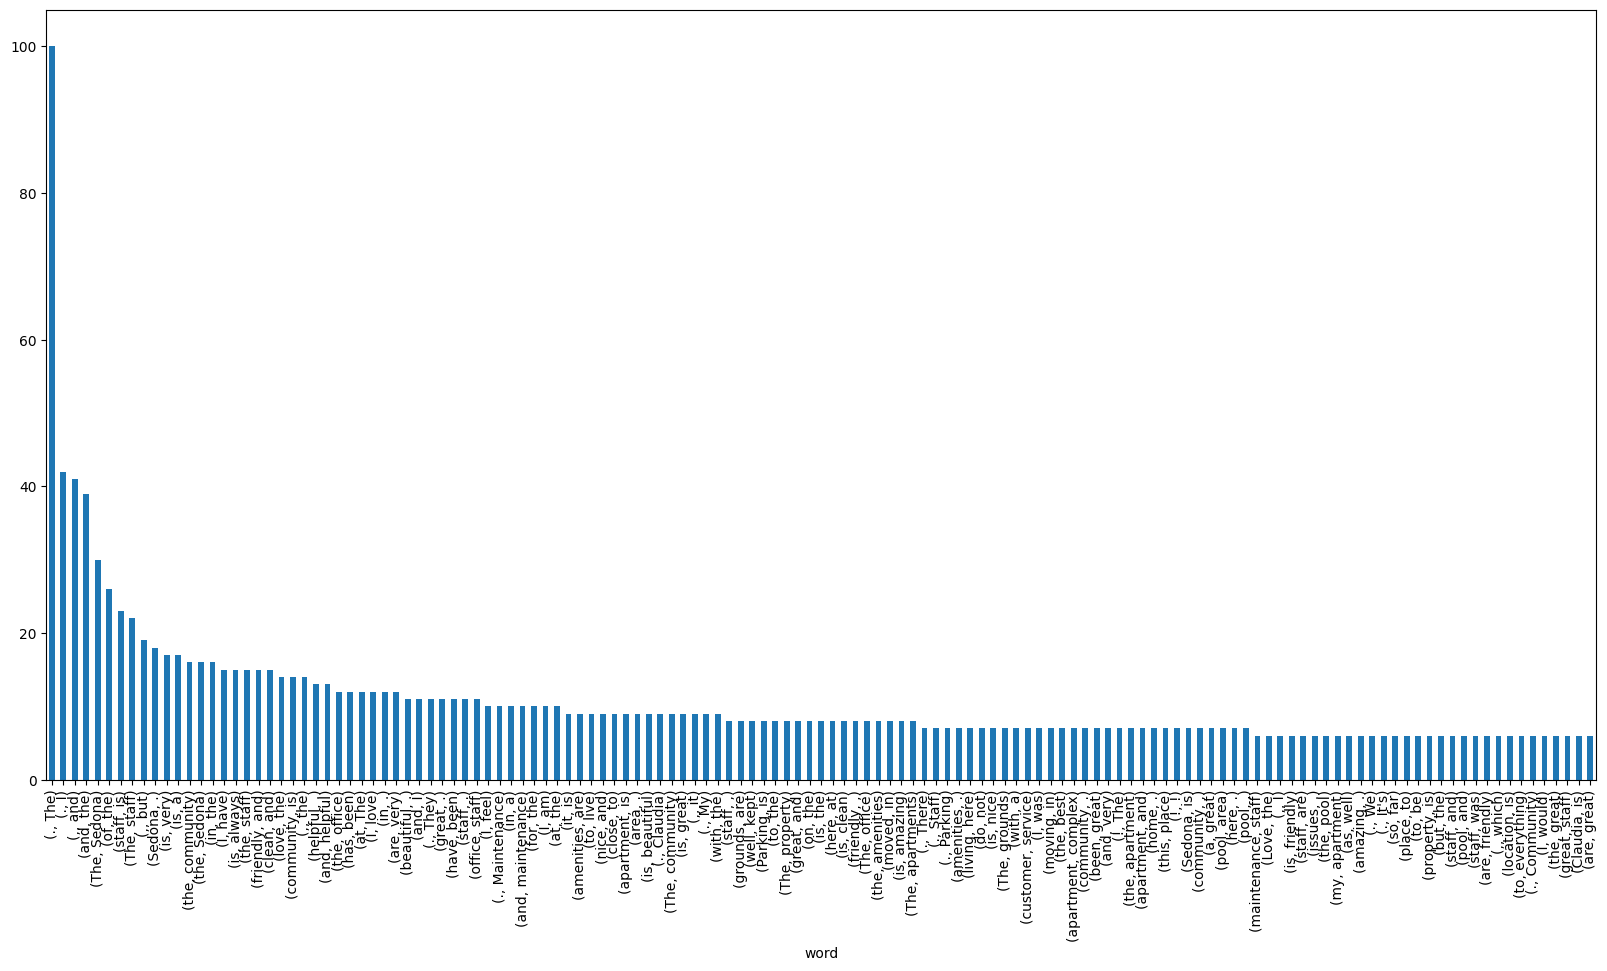

In [163]:


temp = wordCountDF[wordCountDF['cnt'] > 5]
temp.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt', figsize=(20,10), legend=False)
plt.show()

In [ ]:
# This is testing all reviews with tokenization and lemmatization

tempTokenized = tokenFunction(data['Review Text'])
tempLemm = lemmFunction(tempTokenized)
tempBigram = bigramCreator(tempLemm)
tempWordCount = wordCounter(tempBigram)
wordCountLemDF = DFMaker(tempWordCount)

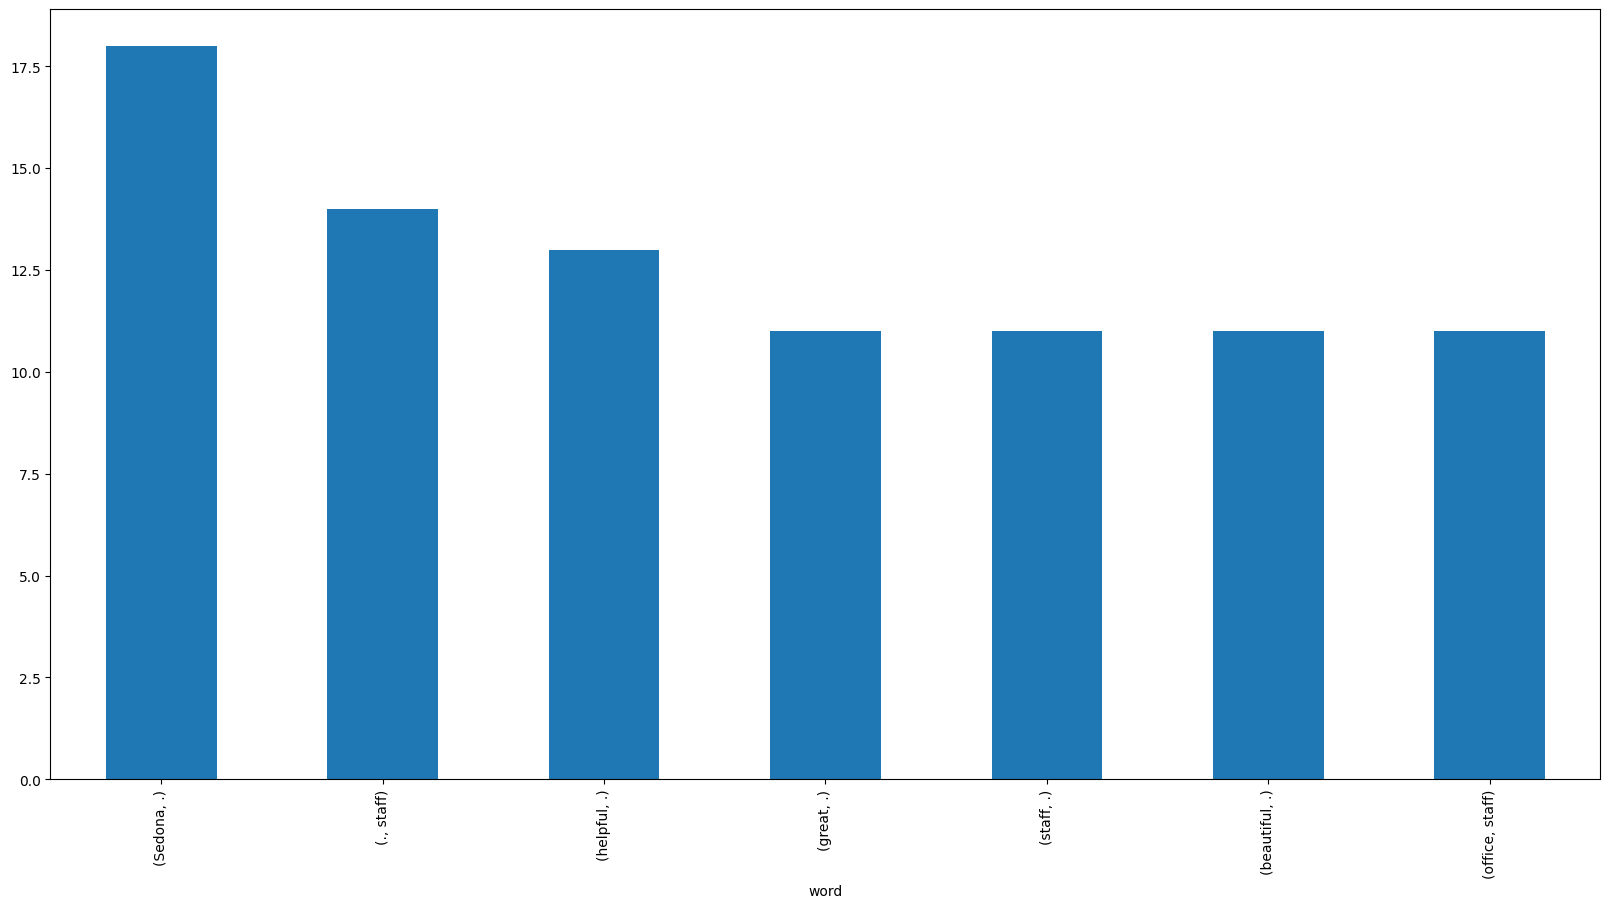

In [167]:
tempL = wordCountLemDF[wordCountLemDF['cnt'] > 10]
tempL.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt', figsize=(20,10), legend=False)
plt.show()

In [170]:
tempClean = textCleaner(data['Review Text'])
tempBigram = bigramCreator(tempClean)
tempWordCount = wordCounter(tempBigram)
wordCountFDF = DFMaker(tempWordCount)

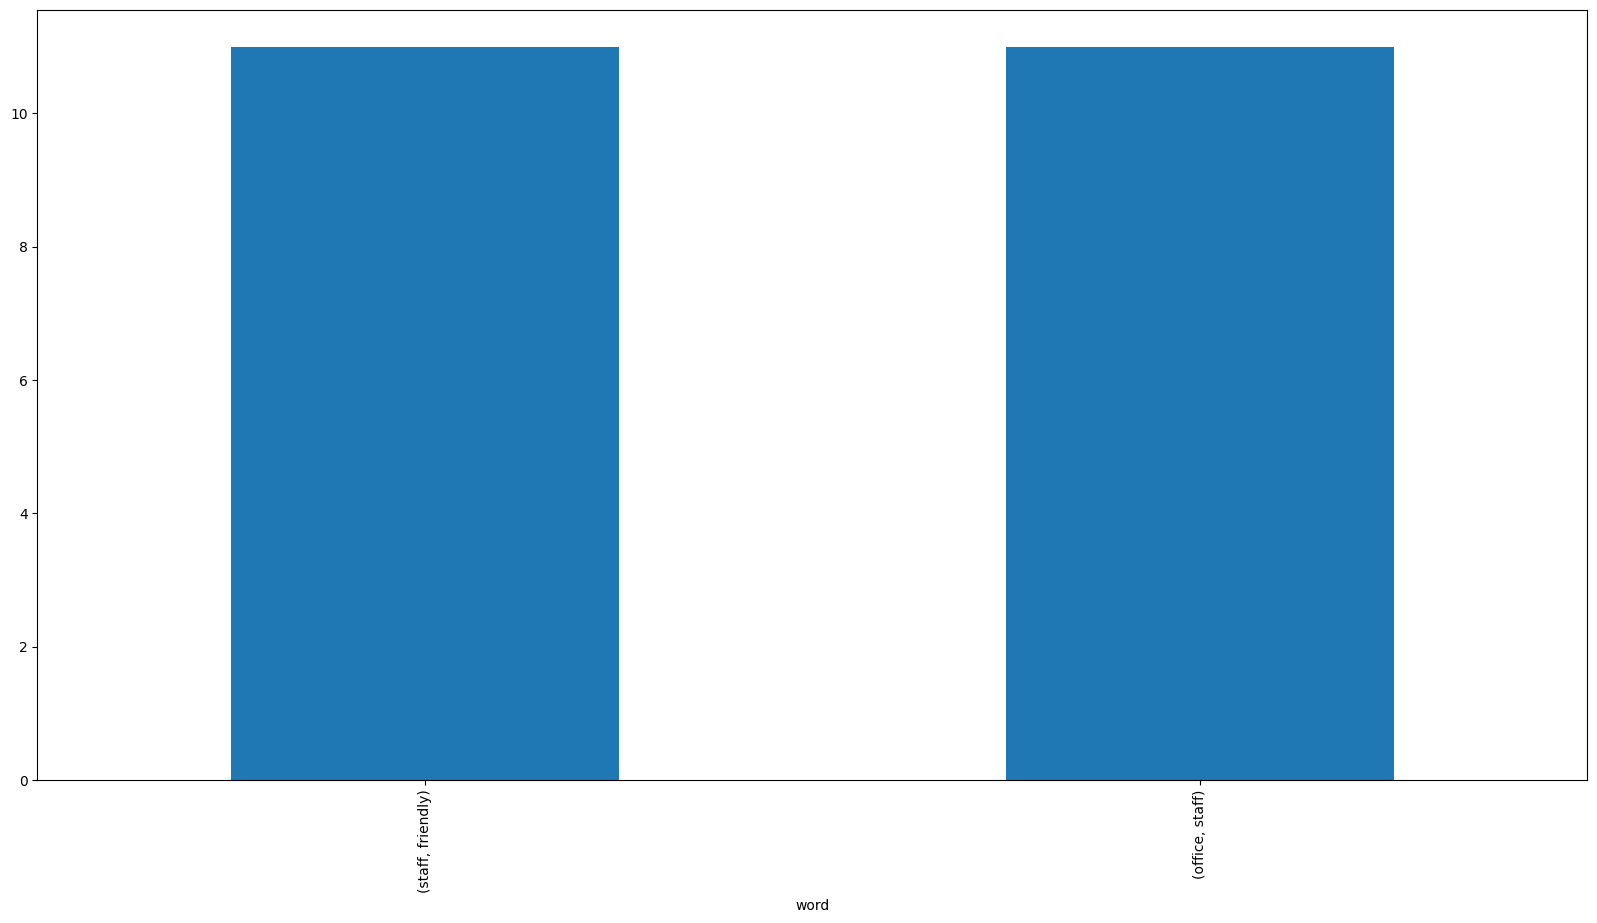

In [180]:
# This is testing with tokenization, lemmatization and punctuation removed.

tempF = wordCountFDF[wordCountFDF['cnt'] > 10]
tempF.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt', figsize=(20,10), legend=False)
plt.show()

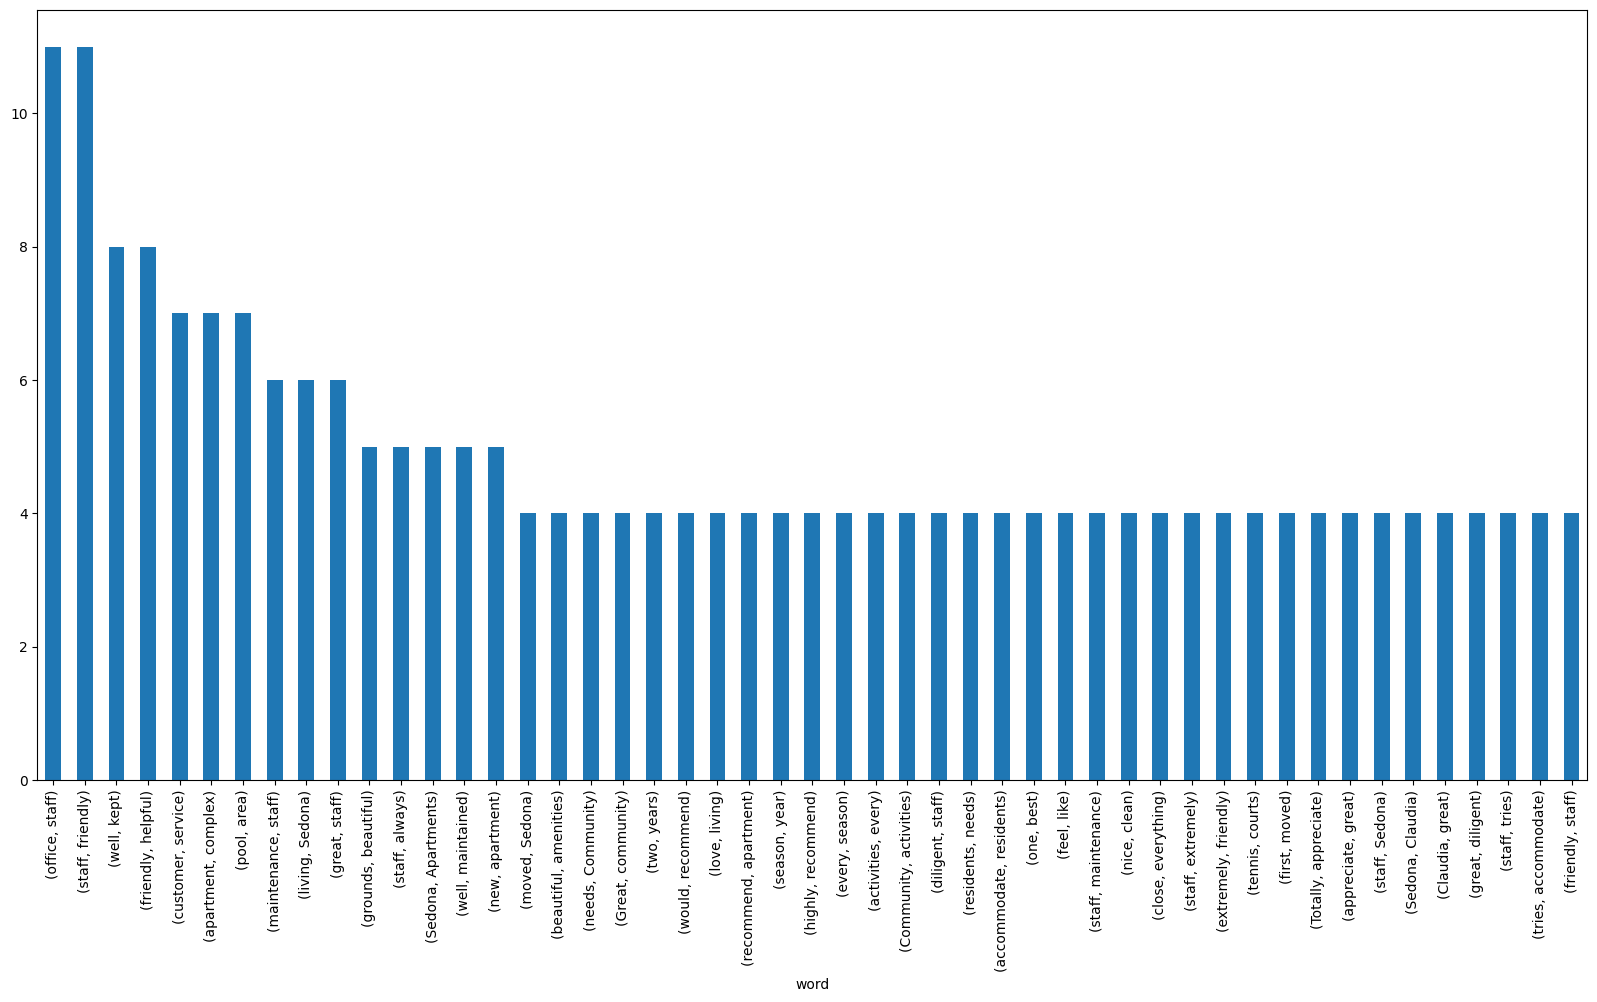

In [183]:
# Same as above except showing results for anything that has occured more than three times.

tempF = wordCountFDF[wordCountFDF['cnt'] > 3]
tempF.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt', figsize=(20,10), legend=False)
plt.show()

In [ ]:
#
#
# Here below I'll check with only Negative sentiment.
#
#

In [172]:
negativeReviews = reviewSorter(data, "Negative")

In [173]:
print(len(negativeReviews))

28


In [174]:
cleanedNegativeReviews = []
cleanedNegativeReviews = textCleaner(negativeReviews)

In [175]:
testB = bigramCreator(cleanedNegativeReviews)
testDict = wordCounter(testB)
testDF = DFMaker(testDict)

In [176]:
print(testDict)

{('Terrible', 'service'): 1, ('service', 'Maintenance'): 1, ('Maintenance', 'asks'): 1, ('asks', 'tenants'): 1, ('tenants', 'complete'): 1, ('complete', 'repairs'): 1, ('repairs', 'even'): 1, ('even', 'show'): 1, ('show', 'submitted'): 1, ('submitted', 'service'): 1, ('service', 'requests'): 1, ('requests', 'sent'): 1, ('sent', 'email'): 1, ('email', 'response'): 1, ('response', 'repair'): 1, ('repair', 'requests'): 1, ('requests', 'go'): 1, ('go', 'unanswered'): 1, ('Sedona', 'beautiful'): 1, ('beautiful', 'property'): 1, ('property', 'floors'): 1, ('floors', 'walls'): 1, ('walls', 'thin'): 2, ('thin', 'living'): 1, ('living', 'hell'): 1, ('hell', 'upstairs'): 1, ('upstairs', 'neighbors'): 1, ('neighbors', 'renewing'): 1, ('renewing', 'lease'): 1, ('lease', 'Many'): 1, ('Many', 'people'): 1, ('people', 'live'): 1, ('live', 'also'): 1, ('also', 'pick'): 1, ('pick', 'dog'): 1, ('dog', 'poop'): 1, ('poop', 'Watch'): 1, ('Watch', 'land'): 1, ('land', 'mines'): 1, ('Community', 'quiet'): 1

In [177]:
print(testDF)

                        word  cnt
0        (Terrible, service)    1
1     (service, Maintenance)    1
2        (Maintenance, asks)    1
3            (asks, tenants)    1
4        (tenants, complete)    1
..                       ...  ...
431        (rules, enforced)    1
432  (enforced, Maintenance)    1
433      (Maintenance, blew)    1
434           (blew, debris)    1
435           (debris, away)    1

[436 rows x 2 columns]


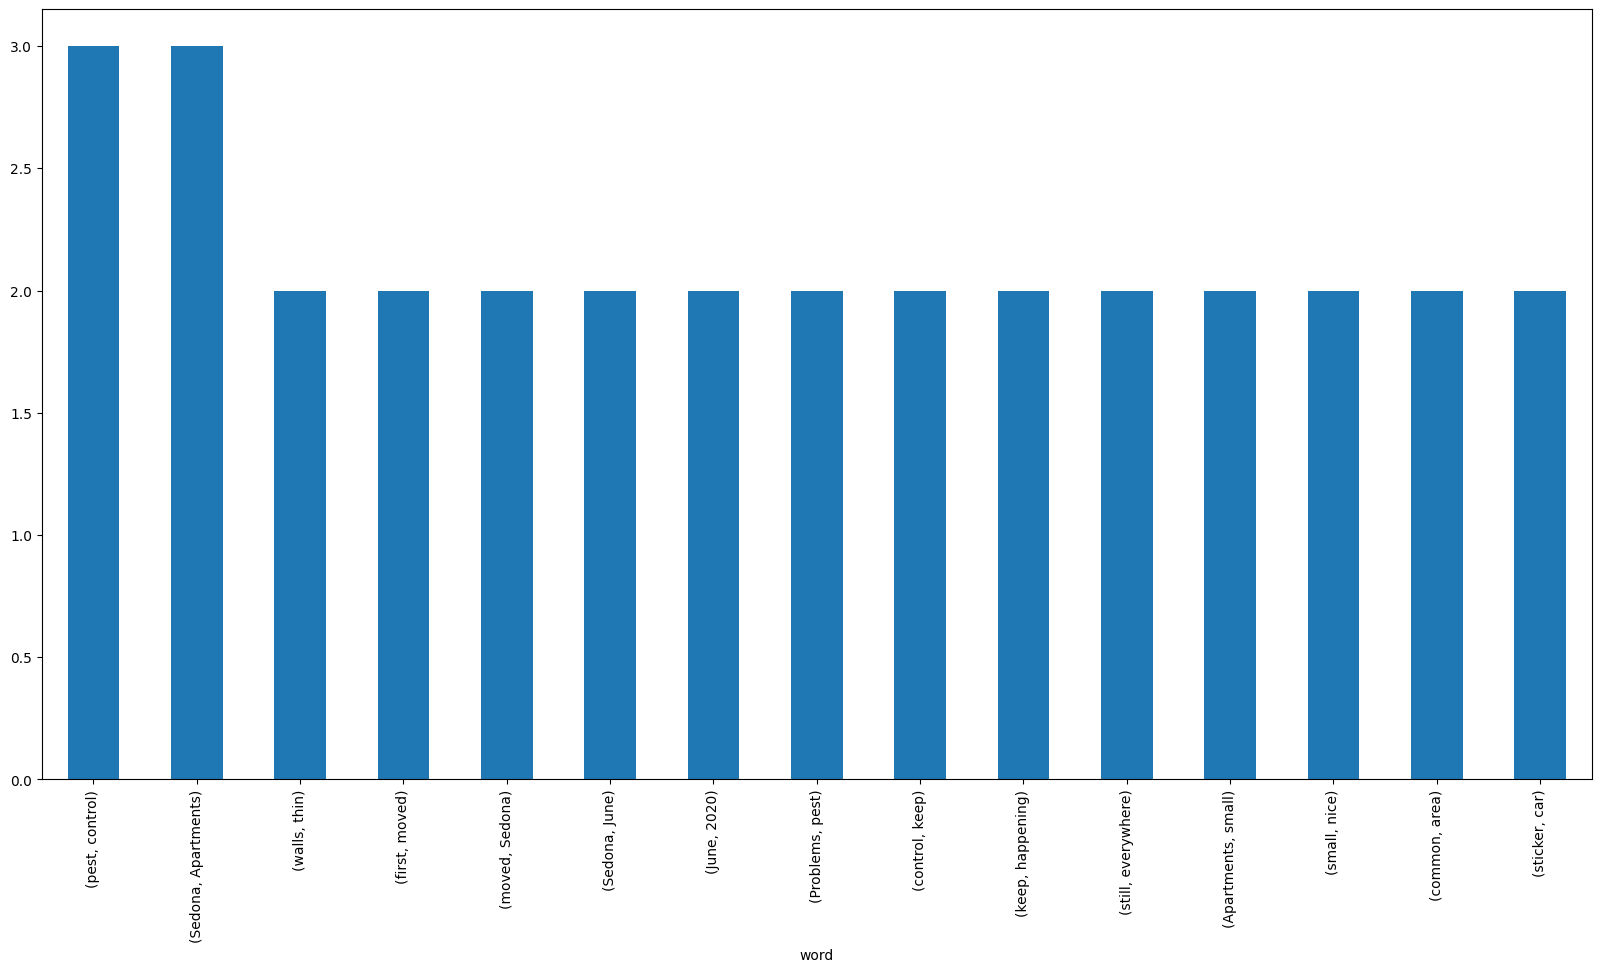

In [179]:
tempN = testDF[testDF['cnt'] > 1]
tempN.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt', figsize=(20,10), legend=False)
plt.show()

In [187]:
testDict2 = wordCounter(cleanedNegativeReviews)
testDF2 = DFMaker(testDict2)

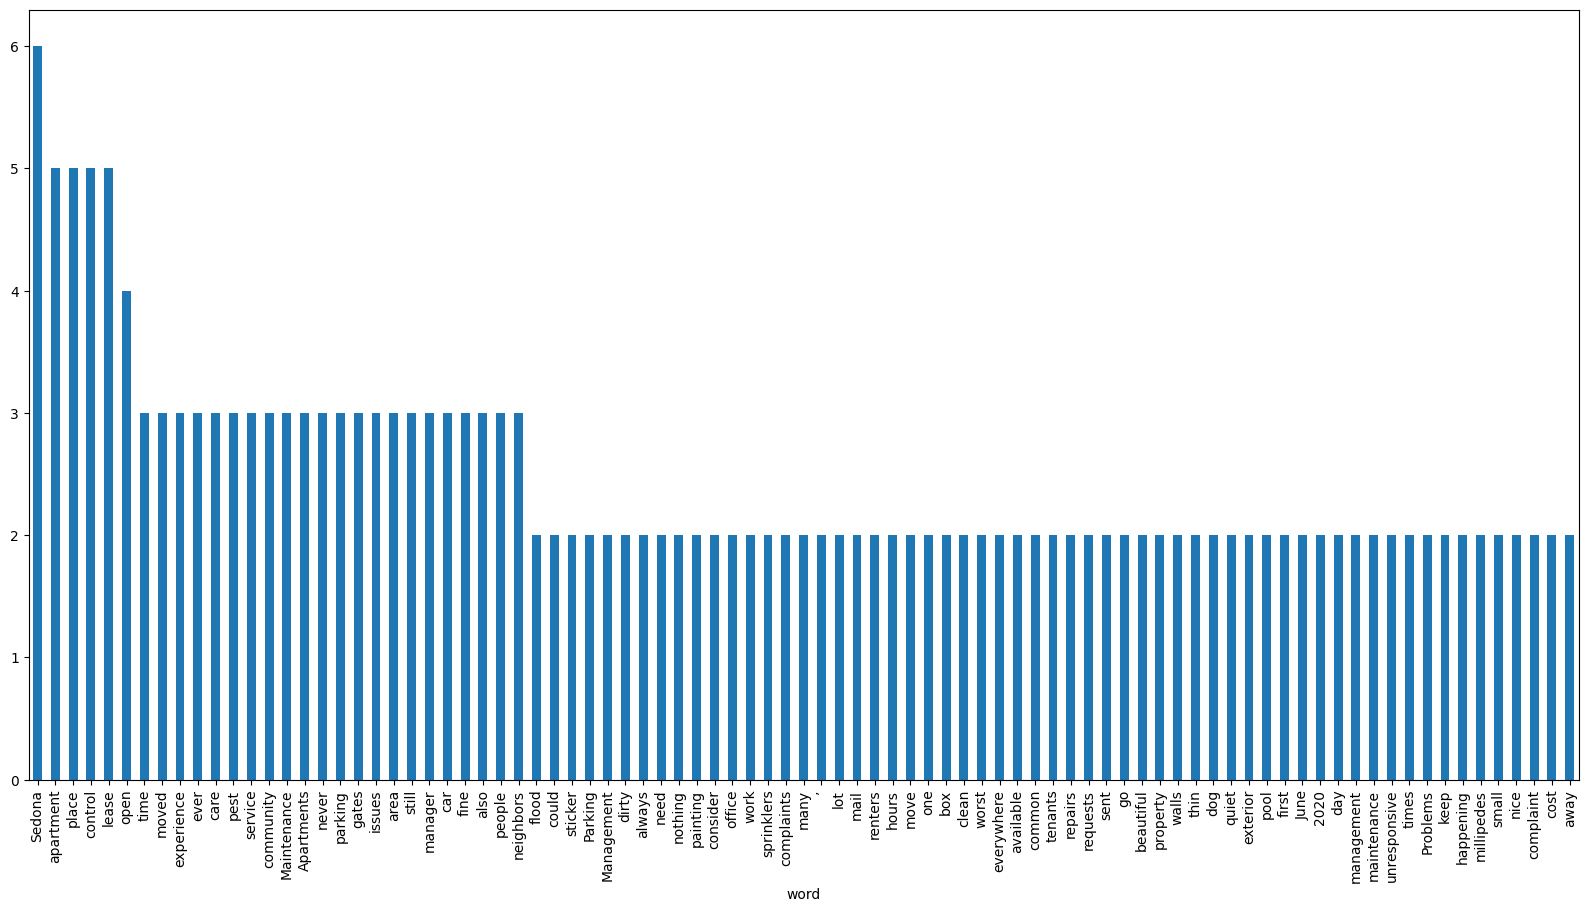

In [188]:
tempN2 = testDF2[testDF2['cnt'] > 1]
tempN2.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt', figsize=(20,10), legend=False)
plt.show()